In [2]:
import sys
import os

# add project root to python path
sys.path.append(os.path.abspath(".."))


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from eos_phi.state import EmotionState
from eos_phi.scenarios import BASIS, SCENARIOS

ALPHA = 0.8   # emotional inertia (0 = very reactive, 1 = very slow)
DIM = 3       # warmth, playfulness, politeness


In [4]:
def describe_state(E_t):
    warmth, play, polite = E_t

    def axis_desc(value, neg_word, pos_word):
        if value > 0.4:
            return f"strongly {pos_word}"
        elif value > 0.15:
            return f"slightly {pos_word}"
        elif value < -0.4:
            return f"strongly {neg_word}"
        elif value < -0.15:
            return f"slightly {neg_word}"
        else:
            return None

    tags = []
    for val, neg, pos in [
        (warmth, "cold", "warm"),
        (play, "serious", "playful"),
        (polite, "rude", "polite"),
    ]:
        tag = axis_desc(val, neg, pos)
        if tag:
            tags.append(tag)

    return ", ".join(tags) if tags else "emotionally neutral"


In [5]:
def run_scenario(sequence, alpha=ALPHA):
    state = EmotionState(dim=DIM, alpha=alpha)
    states = [state.get().copy()]
    descriptions = ["emotionally neutral"]

    for tone in sequence:
        S_i = BASIS[tone]
        E_t = state.update(S_i)
        states.append(E_t.copy())
        descriptions.append(describe_state(E_t))

    return np.array(states), descriptions


In [6]:
scenario_name = "rude_to_supportive"   # change this anytime
sequence = SCENARIOS[scenario_name]

sequence


['neutral',
 'neutral',
 'rude',
 'rude',
 'rude',
 'supportive',
 'supportive',
 'supportive']

In [7]:
states, descriptions = run_scenario(sequence)
states.shape


(9, 3)

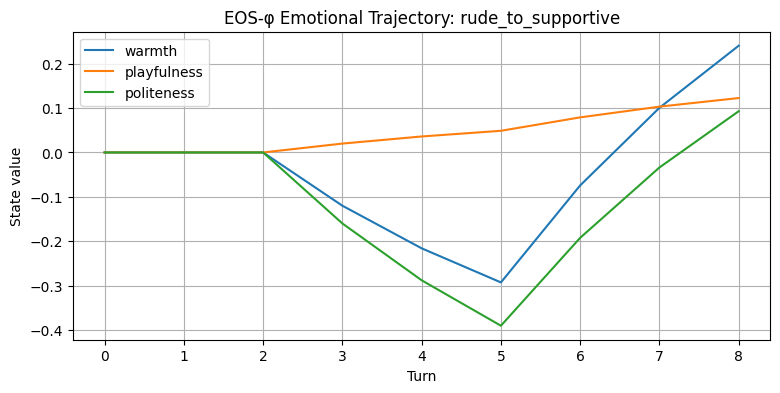

In [8]:
timesteps = np.arange(len(states))

plt.figure(figsize=(9, 4))
plt.plot(timesteps, states[:, 0], label="warmth")
plt.plot(timesteps, states[:, 1], label="playfulness")
plt.plot(timesteps, states[:, 2], label="politeness")

plt.xlabel("Turn")
plt.ylabel("State value")
plt.title(f"EOS-φ Emotional Trajectory: {scenario_name}")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
for t, (tone, E_t, desc) in enumerate(zip(["start"] + sequence, states, descriptions)):
    print(f"Turn {t:2d} | tone: {tone:12s} | E_t = {E_t.round(3)} | {desc}")


Turn  0 | tone: start        | E_t = [0. 0. 0.] | emotionally neutral
Turn  1 | tone: neutral      | E_t = [0. 0. 0.] | emotionally neutral
Turn  2 | tone: neutral      | E_t = [0. 0. 0.] | emotionally neutral
Turn  3 | tone: rude         | E_t = [-0.12  0.02 -0.16] | slightly rude
Turn  4 | tone: rude         | E_t = [-0.216  0.036 -0.288] | slightly cold, slightly rude
Turn  5 | tone: rude         | E_t = [-0.293  0.049 -0.39 ] | slightly cold, slightly rude
Turn  6 | tone: supportive   | E_t = [-0.074  0.079 -0.192] | slightly rude
Turn  7 | tone: supportive   | E_t = [ 0.101  0.103 -0.034] | emotionally neutral
Turn  8 | tone: supportive   | E_t = [0.24  0.123 0.093] | slightly warm
